# Wprowadzenie

### Importowanie modułu
Po pierwsze należy zaimportować moduł biblioteki OpenCv, który nazywa się cv2

In [1]:
import cv2

### Otwieranie plików obrazu
W celu otworzenia pliku zawierającego obraz należy wykorzystać funkcję __cv2.imread()__. Przyjmuje ona dwa argumenty: __ścieżkę do pliku__ oraz __sposób odczytu obrazu__.
Użyj funkcji cv2.imread() do odczytania obrazu. Obraz powinien znajdować się w katalogu roboczym lub powinna być podana pełna ścieżka do obrazu. Wyróżniamy trzy sposoby:

- cv2.IMREAD_COLOR : Ładuje obraz kolorowy. Jakakolwiek przezroczystość obrazu będzie pomijana. Jest to wartość domyślna.
- cv2.IMREAD_GRAYSCALE : Ładuje obraz w skali szarości.
- cv2.IMREAD_UNCHANGED : Wczytany obraz zawiera kanał alpha (przezroczystość)

Zamiast tych trzech flag, można po prostu podać odpowiednio liczby całkowite 1, 0 lub -1.

In [2]:
image = cv2.imread('agh_cv/opencv_logo.png')
image = cv2.imread('agh_cv/opencv_logo.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('agh_cv/opencv_logo.png', -1)

In [3]:
image = cv2.imread('agh_cv/opencv_logo.png')

Zbadajmy czym jest obiekt przypisany do zmiennej __image__ za pomocą funkcji __type__.

In [4]:
type(image)

numpy.ndarray

Jest to znany już tensor pochodzący z biblioteki numpy. W opencv obrazy są wczytywne jako tensory liczb. Aby poznać kształt obrazu należy skorzystać z atrybutu __shape__. W zależności od sposobu wczytania obrazu (kolorowy, szary, z kanałem alpha) kształt naszego obrazu będzie wynosił (wysokość, szerokość, 3 lub 2 lub 4). W przypadku głębokości równej 2, nie jest ona wyświetlana. Analizowany obraz nie zawiera kanału alpha, przykład będzie później.

In [5]:
image = cv2.imread('agh_cv/opencv_logo.png')
print(image.shape)
image = cv2.imread('agh_cv/opencv_logo.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
image = cv2.imread('agh_cv/opencv_logo.png', -1)
print(image.shape)

(378, 428, 3)
(378, 428)
(378, 428, 3)


### Wyświetlanie obrazu
##### cv2 - tylko lokalnie!
Obraz możemy wyświetlić na dwa sposoby. Po pierwsze możemy wyświetlić obraz w nowoutworzonym oknie za pomocą funkcji __cv2.imshow()__. Przujmuje ona dwa argumenty: __nazwę nowego okna__ będącą ciągiem znaków, oraz __zmienną__ do której przypisany jest nasz wczytany obraz. Okno automatycznie dopasowuje się do wielkości obrazu.

In [6]:
cv2.imshow('ala', image)

Zwróćmy uwagę, że "nic się nie stało". Okno zostało utworzone, wyświetlone i natychmiastowo zamknięte. W celu wyświetlania okna tak długo jak potrzebuje użytkownik należy po wywołaniu funkcji __cv2.imshow()__ wywołać jeszcze __cv2.waitKey(0)__, co sprawi, że system operacyjny będzie oczekiwał na wciśnięcie dowolnego klawisza, oraz __cv2.destroyAllWindows()__, której wywołanie zamknie utworzone wcześniej okno i "posprząta" ekran. W celu zamknięcia okna z obrazem, __NIE KLIKNIJ CZERWONEGO KRZYŻYKA__, wystarczy nacisnąć dowolny klawisz na klawiaturze!

In [7]:
cv2.imshow('ala', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### matplotlib
Drugim sposobem wyświetlania obrazu jest wykorzystanie poznanej już wcześniej biblioteki matplotlib, za pomocą której możemy wyświetlać obrazu w środowisku _jupyter_ bez konieczności tworzenia nowych okien. Realizuje to ponownie funkcja __imshow__ tylko pochodząca z pakietu matplotlib.pyplot.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

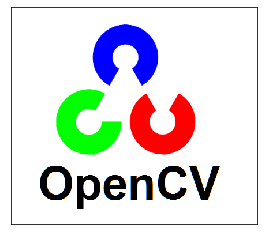

In [9]:
image = cv2.imread('agh_cv/opencv_logo.png')
plt.xticks([]), plt.yticks([])  # usuwamy osie
plt.imshow(image)

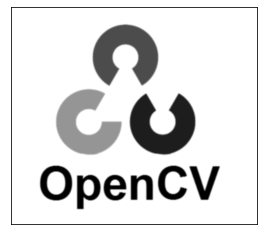

In [10]:
image = cv2.imread('agh_cv/opencv_logo.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

### Zapisywanie obrazów do pliku
W celu zapisania obrazu do pliku należy wykorzystać funkcję __cv2.imwrite()__. Przyjmuje ona dwa argumenty: __ścieżkę do pliku__ oraz __zmienną do której przypisany jest obraz__. Funkcja zwraca wartość True w przypadku powodzenia oraz False, gdy operacja się nie powiodła. Na przykład z powodu podania nieistniejącej ścieżki.

In [11]:
cv2.imwrite('nowy_obraz.png', image)

True

### Slicing
Skoro obrazy są przechowywane jako tablice numpy, możemy wykorzystywać mechanizm slicingu oraz wybierania regionów obrazu za pomocą nawiasów kwadratowych.

**WAŻNE**: w OpenCV najpierw będziemy mieli indeksy wierszy (rosnące w dół), a potem kolumn (rosnące w prawo)!

Przykładowo możemy wyświetlić tylko dolną połowe obrazu:

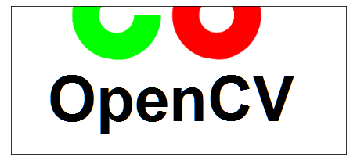

In [12]:
image = cv2.imread('agh_cv/opencv_logo.png')
plt.xticks([]), plt.yticks([])
plt.imshow(image[image.shape[0] // 2:, :])

Bądź co drugą kolumnę

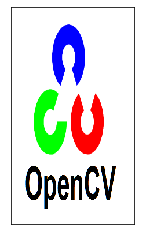

In [13]:
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, ::2])

### Odczytywanie i modyfikacja wartości piksela

[255 255 255]


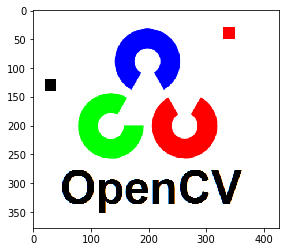

In [14]:
image = cv2.imread('agh_cv/opencv_logo.png')
pixel = image[0, 0]
print(pixel)

image[120:140, 20:40, :] = [0, 0, 0]
image[30:50, 330:350, :] = [255, 0, 0]
plt.imshow(image)

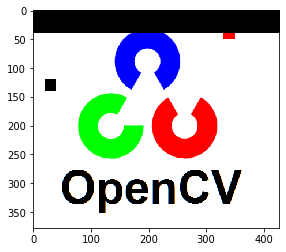

In [15]:
image[:40,:] = [0, 0, 0]
plt.imshow(image)

### Konwertowanie przestrzeni barw
Może się tak zdarzyć, że po wczytaniu obrazu jako kolorowy chcielibyśmy go przenieść do skali szarości. Można to wykonać poprzez funkcję __cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)__ która jako argumenty przyjmuje oryginalny obraz oraz sposób konwersji. [PRZYKŁADY](https://docs.opencv.org/3.4.7/de/d25/imgproc_color_conversions.html)

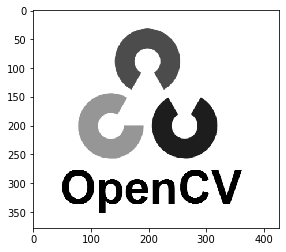

In [16]:
image = cv2.imread('agh_cv/opencv_logo.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

Z obrazkiem OpenCV na samym początku było coś nie tak - kolory są pozamieniane!

Wynika to z faktu, że OpenCV opiera się na przestrzeni barwowej BGR, podczas gdy matplotlib - na RGB.

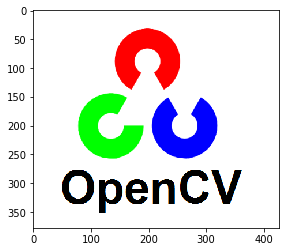

In [17]:
image = cv2.imread('agh_cv/opencv_logo.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Zadanie 1
Otwórz zdjęcie znajdujące się w pliku 'agh_cv/agh.png'

In [18]:
agh = cv2.imread('agh_cv/agh.png')

### Zadanie 2
Napisz funkcję, która będzie przyjmować jako argument wczytane zdjęcie a zwracała napis zależny od wymiarów obrazu w postaci: "Obraz jest rozmiarów SZEROKOŚĆ px na WYSOKOŚĆ px"


In [19]:
def describe(image):
    return f'Obraz jest rozmiarów {image.shape[1]} px na {image.shape[0]} px'

describe(agh)

'Obraz jest rozmiarów 900 px na 600 px'

### Zadanie 3
Wyświetl wczytane zdjęcie za pomocą za pomocą biblioteki matplotlib w jupyterze

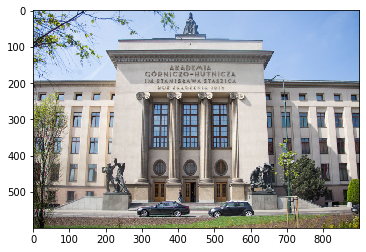

In [20]:
plt.imshow(cv2.cvtColor(agh, cv2.COLOR_BGR2RGB))

### Zadanie 4
Zapisz do pliku obraz który powstanie z:
- Wybrania z oryginalnego obrazu agh.png co trzeciej kolumny
- Przeniesienia obrazu do skali szarości
- Wybrania dolnej połowy obrazu
- Zapisz nowy obraz do pliku nazywając go agh_gray.png

True

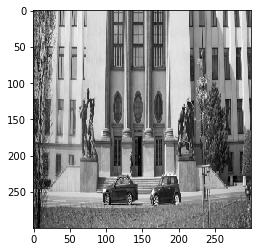

In [21]:
agh = agh[:, ::3]
agh_gray = cv2.cvtColor(agh, cv2.COLOR_BGR2GRAY)
agh_gray = agh_gray[agh_gray.shape[0] // 2:]
plt.imshow(agh_gray, cmap='gray')
cv2.imwrite('agh_gray.png', agh_gray)

### Zadanie 5
- Otwórz zdjęcie znajdujące się w pliku 'agh_cv/agh.png'
- Wykorzystując mechanizm slicingu dodaj do zdjęcia czarną ramkę o grubości 15px. (czarny pixel to [0, 0, 0])
- Zapisz nowy obraz do pliku nazywajac go agh_frame.png

True

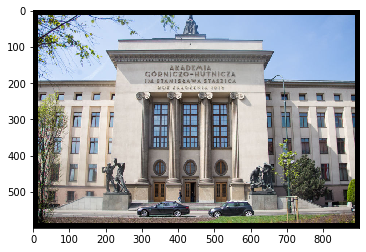

In [22]:
agh = cv2.imread('agh_cv/agh.png')
agh[:15] = [0, 0, 0]
agh[agh.shape[0] - 15:] = [0, 0, 0]
agh[:, :15] = [0, 0, 0]
agh[:, agh.shape[1] - 15:] = [0, 0, 0]
plt.imshow(cv2.cvtColor(agh, cv2.COLOR_BGR2RGB))
cv2.imwrite('agh_frame.png', agh)

### Zadanie 6
Przygotuj uniwersalną funkcję wyświetlania obrazu:
- dla obrazu w skali szarości - wyświetl obraz w skali szarości
- dla obrazu BGR wyświetl obraz RGB

In [26]:
def imshow(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

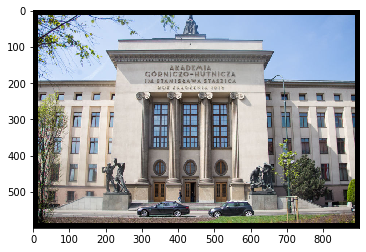

In [28]:
imshow(agh)

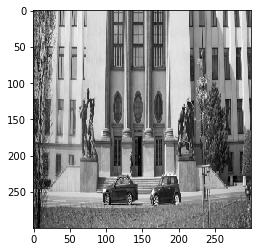

In [29]:
imshow(agh_gray)